In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df= pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()
# print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()
#to check if there is any duplicated rows and sum them

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
# to remove unwanted clmn 

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# to one-hot-encode the categorical columns
df= pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

In [12]:
print(df.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')


In [13]:
X= df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [15]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [16]:
X_train.shape

(8000, 11)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [19]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model= Sequential() #making an obj of this cls
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))
#here we add layers nd form the neural network

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

Ab krna h model compile.

In [22]:
model.compile(optimizer='Adam',loss='binary_crossentropy')

In [23]:
history= model.fit(X_train_scaled,y_train,epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5147 - val_loss: 0.4857
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4808 - val_loss: 0.4685
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4552 - val_loss: 0.4592
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4647 - val_loss: 0.4524
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4551 - val_loss: 0.4474
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4334 - val_loss: 0.4435
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4392 - val_loss: 0.4406
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4351 - val_loss: 0.4383
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4351 - val_loss: 0.4363
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4279 - val_loss: 0.4349
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4317 - val_loss: 0.4336
Epoch 12/100
200/200 ━━━━━━━━━━━━━━━━━━━━

In [24]:
model.layers[0].get_weights()
#yaha se we will get our weights and the last array is of bias values. total 36 

[array([[ 0.09321105, -0.06492373,  0.18628532],
        [-2.005259  ,  0.20945203, -3.7194545 ],
        [ 0.08241256,  0.16444433, -0.07440527],
        [-0.61741906, -0.5680746 ,  0.21855345],
        [-0.06055554,  0.251722  ,  0.03550006],
        [ 0.67756397,  0.07746308, -0.32076877],
        [-0.01552757,  2.4864314 , -1.1595774 ],
        [-0.62457454, -0.06613103,  0.29423368],
        [-0.96021086, -0.6135735 , -0.19896404],
        [ 0.513409  , -0.09315898, -0.4147076 ],
        [ 0.5792486 ,  0.7931621 ,  0.02710383]], dtype=float32),
 array([-0.1204917 , -0.16492178,  0.408706  ], dtype=float32)]

In [25]:
model.layers[1].get_weights()

[array([[-1.1272218],
        [-2.084089 ],
        [-2.1323261]], dtype=float32),
 array([1.0901285], dtype=float32)]

In [26]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [27]:
y_pred= np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8315

In [29]:
import matplotlib.pyplot as plt

In [30]:
history.history

{'loss': [0.5034496784210205,
  0.4740810692310333,
  0.46042779088020325,
  0.45167088508605957,
  0.44515982270240784,
  0.4402788281440735,
  0.43663880228996277,
  0.4338230788707733,
  0.43173080682754517,
  0.42997458577156067,
  0.4286485016345978,
  0.4275718927383423,
  0.42658665776252747,
  0.4257551431655884,
  0.4249821901321411,
  0.4242545962333679,
  0.4234660267829895,
  0.422748327255249,
  0.4221132695674896,
  0.42130815982818604,
  0.4206660985946655,
  0.4199486970901489,
  0.4193252921104431,
  0.418618381023407,
  0.41805189847946167,
  0.4174758493900299,
  0.4169604480266571,
  0.41645297408103943,
  0.41598090529441833,
  0.4155665636062622,
  0.4150708019733429,
  0.4145721197128296,
  0.4141802489757538,
  0.413781076669693,
  0.41341811418533325,
  0.4130300283432007,
  0.4126811921596527,
  0.4123093783855438,
  0.4119514226913452,
  0.4116772413253784,
  0.4113718271255493,
  0.41101062297821045,
  0.4107936918735504,
  0.41049158573150635,
  0.410196661

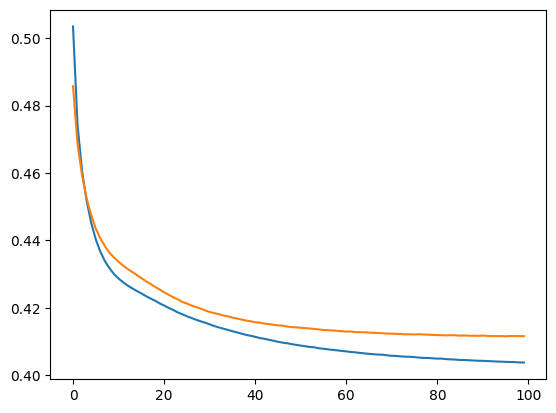

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])